In [1]:
import praw
import pandas as pd

In [2]:
reddit = praw.Reddit(client_id='kEhYJJanyud3jQ',
                     client_secret='k81gCR33nRsHd1CkkRhM3lqAGzw',
                     password='Annie62595',
                     user_agent='testscript by /u/peterz36',
                     username='peterz36')

In [107]:
import pandas as pd
posts = []
ml_subreddit = reddit.subreddit('depression')
for post in ml_subreddit.new(limit=1000):
    posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created, post.author])
posts = pd.DataFrame(posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created', 'user'])
print(posts)

                                                 title  score      id  \
0                   midnight thought about feelings :|      1  g23i9n   
1            my creativity is gone and its killing me.      1  g23g09   
2    Hardships and failures aren't scary, the most ...      1  g23fvw   
3                         I just lost my whole family.      1  g23ftj   
4                         Any attempters here? Please.      1  g23fih   
..                                                 ...    ...     ...   
995  Does anyone else get depressed when they are h...      1  g0tzte   
996                    I feel like a goddamned failure      2  g0tzra   
997                                      I feel alone.      5  g0txby   
998                                      I Hate Myself      4  g0tuu3   
999  So many people are dying because of COVID 19 a...     33  g0tp7b   

      subreddit                                                url  \
0    depression  https://www.reddit.com/r/depression/

In [108]:
d_users = posts.user
d_karma = []
for user in d_users:
   try:
    d_karma.append(reddit.redditor(user).comment_karma)
   except:
    d_karma.append(0)
        

In [109]:
user_df = pd.DataFrame({'Users': d_users, 'Karma': d_karma})
users_filtered = user_df[user_df["Karma"] > 100]
users_filtered

,Users,Karma
2,supersaiyanboner,867
3,WolfIsntDead,398
9,FarrayneSakona,779
13,KatarinaMolovSOP,1172
15,zeebyPL,15035
...,...,...
989,115673,226
995,a-potato-flew-away,701
996,oneofthegood1s,240
998,jenderalsoedirman,670


In [4]:
testuser = []
for submission in reddit.redditor('ReddyReddit91').submissions.new():
    testuser.append([submission.title, submission.selftext, submission.subreddit])
    print(submission.title)

Please rate my song! It's the first time I've tried to sing my poetry. Criticism welcome
I use to work with this guy. Shocked that he has been conned into Herbalife. Self employed tradesman as well.
Essex police have just dispersed a gathering of crows. Few arrests have been made for attempted murder.
I was feeling so high for the past few days. I hadn't had the phase of feeling indestructible. I'm feeling rock bottom suicidal now so didn't prepare for this sink.
This potato
This potato
What can I do in cas fulledit mode?
Atlantic Cigar no longer ships to the UK. Any alternatives people use?
About a boy who befriends a gang leader. They fight another gang who enjoy listening to the Beatles(?). I believe the gang leader is called Wolf or similar. I remember the boy's sister straitened her hair with an iron.
People are bollocking about with the tradition of pancakes for pancake day. Anything other than the combination of Jif lemon and sugar is heinously American.
Why does drinking and dr

In [5]:
df = pd.DataFrame(testuser)

In [6]:
df.head(100)

,0,1,2
0,Please rate my song! It's the first time I've ...,,ratemysong
1,I use to work with this guy. Shocked that he h...,,antiMLM
2,Essex police have just dispersed a gathering o...,[removed],CasualUK
3,I was feeling so high for the past few days. I...,Feel guilty because I know that there are load...,depression
4,This potato,,mildlyvagina
...,...,...,...
95,UK B/SOTL! Has anyone signed up for the Cgars ...,,cigars
96,What is sub to pewdie all about?,[removed],OutOfTheLoop
97,Online buy from Cgars 2№ splits about an inch,I bought a La Flor Dominicana Salomon Unico - ...,cigars
98,hygrometer help.,"Hi B/SOTL,\n\nI have recently bought a new Ger...",cigars


In [7]:
df.columns = ["Title", "Text", "Subreddit"]

In [8]:
#next steps
    #filtering empty posts
    #filtering users with to few posts
    #filtering depression related posts

In [13]:
df_filtered = df[(df.Text != '') & (df.Subreddit != 'SuicideWatch')]
print(df_filtered)

                                                Title  \
2   Essex police have just dispersed a gathering o...   
3   I was feeling so high for the past few days. I...   
6                 What can I do in cas fulledit mode?   
8   About a boy who befriends a gang leader. They ...   
9   People are bollocking about with the tradition...   
10  Why does drinking and driving seem the norm in...   
11                                     And it begins.   
12                                     And it begins.   
13                                     And it begins.   
18  I keep having events in my dreams that involve...   
21          First time on Xanax. What's the big deal?   
24       Any issues putting machine rolls in humidor.   
26                       Message from Atlantic Cigars   
28  Within a 24 hour period, my Humidity seems to ...   
31  After exploring some FB Cigar groups, how the ...   
32                    Ordering a 20 count from online   
33                         Awai

In [85]:
import re, string
import nltk
import inflect
import contractions
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from bs4 import BeautifulSoup
import unicodedata
import spacy
from contraction_list import CONTRACTION_MAP
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [25]:
samples = df_filtered['Title']

In [92]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)
sample_text = ''
for sample in samples:
    sample = replace_contractions(sample)
    sample_text += sample

In [93]:
corpus = sample_text

In [97]:
words = nltk.word_tokenize(corpus)

In [76]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    words = remove_stopwords(words)
    return words


In [98]:
words_cleaned = normalize(words)

In [99]:
def stem_and_lemmatize(words):
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return stems, lemmas


In [100]:
stems, lemmas = stem_and_lemmatize(words_cleaned)
print('Stemmed:\n', stems)
print('\nLemmatized:\n', lemmas)


Stemmed:
 ['essex', 'pol', 'dispers', 'gath', 'crow', 'arrest', 'mad', 'attempt', 'murder', 'feel', 'high', 'past', 'day', 'phas', 'feel', 'indestruct', 'feel', 'rock', 'bottom', 'suicid', 'prep', 'sinkwh', 'cas', 'fulledit', 'mod', 'boy', 'befriend', 'gang', 'lead', 'fight', 'anoth', 'gang', 'enjoy', 'list', 'beatl', 'believ', 'gang', 'lead', 'cal', 'wolf', 'simil', 'rememb', 'boy', 'sist', 'straitened', 'hair', 'ironpeopl', 'bollock', 'tradit', 'pancak', 'pancak', 'day', 'anyth', 'combin', 'jif', 'lemon', 'sug', 'hein', 'americanwhy', 'drink', 'driv', 'seem', 'norm', 'us', 'beginsand', 'beginsand', 'begins', 'keep', 'ev', 'dream', 'involv', 'nee', 'pee', 'hap', 'turn', 'real', 'drunk', 'stumbl', 'hold', 'bal', 'fal', 'every', 'whol', 'process', 'nightm', 'self', 'norm', 'involv', 'someon', 'pee', 'next', 'toilet', 'someon', 'watch', 'mefirst', 'tim', 'xanax', 'big', 'deal', 'issu', 'put', 'machin', 'rol', 'humidormess', 'atl', 'cigarswithin', 'twenty-four', 'hour', 'period', 'humid',

In [101]:
stems

['essex',
 'pol',
 'dispers',
 'gath',
 'crow',
 'arrest',
 'mad',
 'attempt',
 'murder',
 'feel',
 'high',
 'past',
 'day',
 'phas',
 'feel',
 'indestruct',
 'feel',
 'rock',
 'bottom',
 'suicid',
 'prep',
 'sinkwh',
 'cas',
 'fulledit',
 'mod',
 'boy',
 'befriend',
 'gang',
 'lead',
 'fight',
 'anoth',
 'gang',
 'enjoy',
 'list',
 'beatl',
 'believ',
 'gang',
 'lead',
 'cal',
 'wolf',
 'simil',
 'rememb',
 'boy',
 'sist',
 'straitened',
 'hair',
 'ironpeopl',
 'bollock',
 'tradit',
 'pancak',
 'pancak',
 'day',
 'anyth',
 'combin',
 'jif',
 'lemon',
 'sug',
 'hein',
 'americanwhy',
 'drink',
 'driv',
 'seem',
 'norm',
 'us',
 'beginsand',
 'beginsand',
 'begins',
 'keep',
 'ev',
 'dream',
 'involv',
 'nee',
 'pee',
 'hap',
 'turn',
 'real',
 'drunk',
 'stumbl',
 'hold',
 'bal',
 'fal',
 'every',
 'whol',
 'process',
 'nightm',
 'self',
 'norm',
 'involv',
 'someon',
 'pee',
 'next',
 'toilet',
 'someon',
 'watch',
 'mefirst',
 'tim',
 'xanax',
 'big',
 'deal',
 'issu',
 'put',
 'mach

In [102]:
lemmas

['essex',
 'police',
 'disperse',
 'gather',
 'crow',
 'arrest',
 'make',
 'attempt',
 'murderi',
 'feel',
 'high',
 'past',
 'days',
 'phase',
 'feel',
 'indestructible',
 'feel',
 'rock',
 'bottom',
 'suicidal',
 'prepare',
 'sinkwhat',
 'cas',
 'fulledit',
 'mode',
 'boy',
 'befriend',
 'gang',
 'leader',
 'fight',
 'another',
 'gang',
 'enjoy',
 'listen',
 'beatles',
 'believe',
 'gang',
 'leader',
 'call',
 'wolf',
 'similar',
 'remember',
 'boy',
 'sister',
 'straiten',
 'hair',
 'ironpeople',
 'bollocking',
 'tradition',
 'pancakes',
 'pancake',
 'day',
 'anything',
 'combination',
 'jif',
 'lemon',
 'sugar',
 'heinously',
 'americanwhy',
 'drink',
 'drive',
 'seem',
 'norm',
 'us',
 'beginsand',
 'beginsand',
 'beginsi',
 'keep',
 'events',
 'dream',
 'involve',
 'need',
 'pee',
 'happen',
 'turn',
 'really',
 'drink',
 'stumble',
 'hold',
 'balance',
 'fall',
 'every',
 'whole',
 'process',
 'nightmare',
 'self',
 'normally',
 'involve',
 'someone',
 'pee',
 'next',
 'toilet',

In [106]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(stems)
X_train_counts.shape

(294, 243)

In [ ]:
#Extract recent posts from r/depresson and r/askreddit
#Find user names, filter by karma
#get post history of users, filter depression related
#clean and tokenize
#####Visualize word frequency between two groups
#extract features---? (HTF?)


In [118]:
from wordcloud import WordCloud

In [119]:
WordCloud().generate(text)

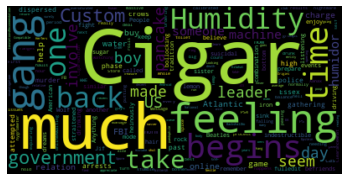

In [123]:
import matplotlib.pyplot as plt


text = "this is a sentence"

# Generate a word cloud image
wordcloud = WordCloud().generate(corpus)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [127]:
depressed_post_text = ''
for post in posts.body:
    x = replace_contractions(post)
    depressed_post_text += x

In [128]:
depressed_post_text

'as I am lying in the dark trying to fall asleep in the midst of a depressive episode, a question comes to me:\nis it worse to feel nothing or to feel everything?\nwhen i feel numb i get frustrated that i know what i want to feel, but i can not let the emotions out.\nbut being overwhelmed with feelings of sadness, hopelessness, disappointment..(the list goes on), is torturous in itself.\n\nidk if anyone relates to this, I have been on reddit for a while and never posted but seeing people who i relate to has given me some validation when the people around me do not understand.  i hope i can do the same for others :)i can not write like i used to. my work engagement online took a sharp drop and is still falling. the only people engaging are the friends i made when i was in a better place, and sometimes not even them. i miss making stories that could move people. i loved seeing them cry and rejoice in my comment section. now the only comment is an occasional "keep up the good work op," an

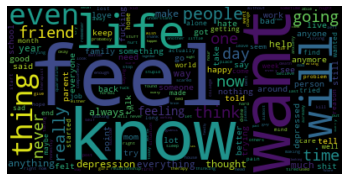

In [129]:
wordcloud = WordCloud().generate(depressed_post_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)
sample_text = ''
for sample in samples:
    sample = replace_contractions(sample)
    sample_text += sample

In [ ]:
#Get most recent 1000 posts in r/depression
#get users from those posts
#filter deression related posts
#get all posts from those 1000 users
#filter users for karma over 100
